# Analysis Plan
## Tiffany Marks 

In [1]:
import pandas as pd
import json
import base64
import requests
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import requests

For my report I'll need to collect Spotify information so I need to get my Spotify client ID

In [2]:
keys = pd.read_csv("Spotify-Keys_10-18-22", header = 0, sep = ",")

In [3]:
appid = keys['Client_ID'][0]

In [4]:
appsecret = keys['Client_Secret'][0]

In [5]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [6]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [7]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [8]:
response = requests.post(access_token_url, headers = header, data = payload)

In [9]:
session_token = response.json()['access_token']

In [10]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

On November 30, 2022, Spotify released its yearly Spotify Wrapped campaign. It's a fun way for users to see their listening data for the year. Along with personal and individual data for single users, Spotify collected the most listened to tracks overall in 2022. I took the top 50 most listened to songs and put them into a playlist and will collect that data next.

In [11]:
playlist = '27HaXqLrsN31FyG46FJ6WJ' 

playlist = '37i9dQZF1DXbJMiQ53rTyJ'

In [12]:
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}".format(playlist)

In [13]:
playlist_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)

In [14]:
playlist_tracks.status_code

200

In [15]:
playlist_dict = json.loads(playlist_tracks.text)

In [16]:
playlist_dict.keys()

dict_keys(['collaborative', 'description', 'external_urls', 'followers', 'href', 'id', 'images', 'name', 'owner', 'primary_color', 'public', 'snapshot_id', 'tracks', 'type', 'uri'])

In [17]:
playlist_dict['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [18]:
playlist_dict['tracks']['items'][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [19]:
playlist_track_ids = [x['track'] for x in playlist_dict['tracks']['items']]

In [20]:
full=pd.DataFrame(playlist_track_ids)

I will now have every track off the playlist.

In [21]:
full.head()

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,167303,False,False,{'isrc': 'USSM12200612'},{'spotify': 'https://open.spotify.com/track/4D...,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,4Dvkj6JhhA12EX05fT7y2e,False,As It Was,92,https://p.scdn.co/mp3-preview/f0c2adc40766cd8c...,True,4,track,spotify:track:4Dvkj6JhhA12EX05fT7y2e
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,238805,False,False,{'isrc': 'GBUM72000433'},{'spotify': 'https://open.spotify.com/track/02...,https://api.spotify.com/v1/tracks/02MWAaffLxlf...,02MWAaffLxlfxAUY7c5dvx,False,Heat Waves,87,None,True,14,track,spotify:track:02MWAaffLxlfxAUY7c5dvx
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,232066,False,True,{'isrc': 'USRC12201440'},{'spotify': 'https://open.spotify.com/track/4k...,https://api.spotify.com/v1/tracks/4k6Uh1HXdhtu...,4k6Uh1HXdhtusDW5y8Gbvy,False,Bad Habit,88,https://p.scdn.co/mp3-preview/b46cf3781e6cbe5b...,True,5,track,spotify:track:4k6Uh1HXdhtusDW5y8Gbvy
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,178567,False,True,{'isrc': 'QM6MZ2214877'},{'spotify': 'https://open.spotify.com/track/6S...,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,6Sq7ltF9Qa7SNFBsV5Cogx,False,Me Porto Bonito,95,https://p.scdn.co/mp3-preview/8513b15fb5b39966...,True,3,track,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,173947,False,True,{'isrc': 'USAT22203024'},{'spotify': 'https://open.spotify.com/track/0w...,https://api.spotify.com/v1/tracks/0wHFktze2PHC...,0wHFktze2PHC5jDt3B17DC,False,First Class,85,https://p.scdn.co/mp3-preview/ec2263e955b141e7...,True,4,track,spotify:track:0wHFktze2PHC5jDt3B17DC


I will remove columns that aren't needed

In [22]:
full2 = full.drop(columns = ['available_markets', 'disc_number', 'episode', 'external_ids', 'is_local', 'preview_url', 'track', 'track_number', 'type'])

In [23]:
full2.head()

,album,artists,duration_ms,explicit,external_urls,href,id,name,popularity,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,167303,False,{'spotify': 'https://open.spotify.com/track/4D...,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,4Dvkj6JhhA12EX05fT7y2e,As It Was,92,spotify:track:4Dvkj6JhhA12EX05fT7y2e
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,238805,False,{'spotify': 'https://open.spotify.com/track/02...,https://api.spotify.com/v1/tracks/02MWAaffLxlf...,02MWAaffLxlfxAUY7c5dvx,Heat Waves,87,spotify:track:02MWAaffLxlfxAUY7c5dvx
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,232066,True,{'spotify': 'https://open.spotify.com/track/4k...,https://api.spotify.com/v1/tracks/4k6Uh1HXdhtu...,4k6Uh1HXdhtusDW5y8Gbvy,Bad Habit,88,spotify:track:4k6Uh1HXdhtusDW5y8Gbvy
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,178567,True,{'spotify': 'https://open.spotify.com/track/6S...,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,95,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,173947,True,{'spotify': 'https://open.spotify.com/track/0w...,https://api.spotify.com/v1/tracks/0wHFktze2PHC...,0wHFktze2PHC5jDt3B17DC,First Class,85,spotify:track:0wHFktze2PHC5jDt3B17DC


Next I'll go through columns album and artist to separate and remove any data I don't need

In [24]:
pd.DataFrame(full2['artists'][0])

,external_urls,href,id,name,type,uri
0,{'spotify': 'https://open.spotify.com/artist/6...,https://api.spotify.com/v1/artists/6KImCVD70vt...,6KImCVD70vtIoJWnq6nGn3,Harry Styles,artist,spotify:artist:6KImCVD70vtIoJWnq6nGn3


In [25]:
full2['artists'][0][0]['name']

'Harry Styles'

In [26]:
artist = [x[0]['name'] for x in full2['artists']]

In [27]:
artists_name =  pd.DataFrame(artist)

In [28]:
artists_name.head()

,0
0,Harry Styles
1,Glass Animals
2,Steve Lacy
3,Bad Bunny
4,Jack Harlow


In [29]:
full2['artists_name'] = artists_name

In [30]:
full2.drop(columns = ['artists']).head()

,album,duration_ms,explicit,external_urls,href,id,name,popularity,uri,artists_name
0,"{'album_type': 'album', 'artists': [{'external...",167303,False,{'spotify': 'https://open.spotify.com/track/4D...,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,4Dvkj6JhhA12EX05fT7y2e,As It Was,92,spotify:track:4Dvkj6JhhA12EX05fT7y2e,Harry Styles
1,"{'album_type': 'album', 'artists': [{'external...",238805,False,{'spotify': 'https://open.spotify.com/track/02...,https://api.spotify.com/v1/tracks/02MWAaffLxlf...,02MWAaffLxlfxAUY7c5dvx,Heat Waves,87,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals
2,"{'album_type': 'album', 'artists': [{'external...",232066,True,{'spotify': 'https://open.spotify.com/track/4k...,https://api.spotify.com/v1/tracks/4k6Uh1HXdhtu...,4k6Uh1HXdhtusDW5y8Gbvy,Bad Habit,88,spotify:track:4k6Uh1HXdhtusDW5y8Gbvy,Steve Lacy
3,"{'album_type': 'album', 'artists': [{'external...",178567,True,{'spotify': 'https://open.spotify.com/track/6S...,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,95,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny
4,"{'album_type': 'album', 'artists': [{'external...",173947,True,{'spotify': 'https://open.spotify.com/track/0w...,https://api.spotify.com/v1/tracks/0wHFktze2PHC...,0wHFktze2PHC5jDt3B17DC,First Class,85,spotify:track:0wHFktze2PHC5jDt3B17DC,Jack Harlow


In [31]:
album_data = pd.DataFrame(list(full2['album']))

In [32]:
album_data.head()

,album_type,artists,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri
0,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/5r...,https://api.spotify.com/v1/albums/5r36AJ6VOJtp...,5r36AJ6VOJtp00oxSkBZ5h,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Harry's House,2022-05-20,day,13,album,spotify:album:5r36AJ6VOJtp00oxSkBZ5h
1,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/0K...,https://api.spotify.com/v1/albums/0KTj6k94XZh0...,0KTj6k94XZh0c6IEMfxeWV,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Dreamland (+ Bonus Levels),2020-08-06,day,18,album,spotify:album:0KTj6k94XZh0c6IEMfxeWV
2,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/3K...,https://api.spotify.com/v1/albums/3Ks0eeH0GWpY...,3Ks0eeH0GWpY4AU20D5HPD,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Gemini Rights,2022-07-15,day,10,album,spotify:album:3Ks0eeH0GWpY4AU20D5HPD
3,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/3R...,https://api.spotify.com/v1/albums/3RQQmkQEvNCY...,3RQQmkQEvNCY4prGKE6oc5,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Un Verano Sin Ti,2022-05-06,day,23,album,spotify:album:3RQQmkQEvNCY4prGKE6oc5
4,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",{'spotify': 'https://open.spotify.com/album/2e...,https://api.spotify.com/v1/albums/2eE8BVirX9VF...,2eE8BVirX9VF8Di9hD90iw,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Come Home The Kids Miss You,2022-05-06,day,15,album,spotify:album:2eE8BVirX9VF8Di9hD90iw


In [33]:
album_data.drop(columns = ['artists','available_markets', 'external_urls', 'href', 'id', 'images', 'release_date_precision', 'total_tracks', 'type', 'uri']).head()

,album_type,name,release_date
0,album,Harry's House,2022-05-20
1,album,Dreamland (+ Bonus Levels),2020-08-06
2,album,Gemini Rights,2022-07-15
3,album,Un Verano Sin Ti,2022-05-06
4,album,Come Home The Kids Miss You,2022-05-06


In [34]:
full2['album_type'] = album_data['album_type']
full2['album_name'] = album_data['name']
full2['album_release_date'] = album_data['release_date']

In [35]:
most_streamed_Songs = full2.drop(columns = ['album', 'artists', 'external_urls', 'uri', 'href'])

In [36]:
most_streamed_Songs.head()

,duration_ms,explicit,id,name,popularity,artists_name,album_type,album_name,album_release_date
0,167303,False,4Dvkj6JhhA12EX05fT7y2e,As It Was,92,Harry Styles,album,Harry's House,2022-05-20
1,238805,False,02MWAaffLxlfxAUY7c5dvx,Heat Waves,87,Glass Animals,album,Dreamland (+ Bonus Levels),2020-08-06
2,232066,True,4k6Uh1HXdhtusDW5y8Gbvy,Bad Habit,88,Steve Lacy,album,Gemini Rights,2022-07-15
3,178567,True,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,95,Bad Bunny,album,Un Verano Sin Ti,2022-05-06
4,173947,True,0wHFktze2PHC5jDt3B17DC,First Class,85,Jack Harlow,album,Come Home The Kids Miss You,2022-05-06


I now have the DataFrame for all the track information I want

In [37]:
most_streamed_Songs_ids = most_streamed_Songs['id']

Next I will need the audio features Spotify provides to add on the most_streamed_Songs DataFrame. I have to use the tracks ID to get each songs individual audio features.

In [38]:
most_streamed_Songs_strings = ','.join(str(x) for x in most_streamed_Songs_ids)
most_streamed_Songs_strings

'4Dvkj6JhhA12EX05fT7y2e,02MWAaffLxlfxAUY7c5dvx,4k6Uh1HXdhtusDW5y8Gbvy,6Sq7ltF9Qa7SNFBsV5Cogx,0wHFktze2PHC5jDt3B17DC,1IHWl5LamUGEuP4ozKQSXZ,5PjdY0CKGZdEuoNab3yDmX,29d0nY7TzCoi22XBqDQkiP,2QjOHCTQ1Jl3zawyYOpxh6,3EaJDYHA0KnX88JvDhL9oa,52xJxFP6TqMuO4Yt0eOkMz,5Z9KJZvQzH6PFmb8SNkxuk,4ewazQLXFTDC8XvCbhvtXs,68Dni7IE4VyPkTOH9mRWHr,1Y5Jvi3eLi4Chwqch9GMem,2BcMwX1MPV6ZHP4tUT9uq6,59nOXPmaKlBfGMDeOVGrIK,6HMtHNpW6YPi1hrw9tgF8P,3CIyK1V4JEJkg02E4EJnDl,58ge6dfP91o9oXMzq3XkIS,4SqWKzw0CbA05TGszDgMlc,4ZtFanR9U6ndgddUvNcjcG,6Uj1ctrBOjOas8xZXGqKk4,3F5CgOj3wFlRv51JsHbxhe,6I3mqTwhRpn34SLVafSH7G,2LBqCSwhJGcFQeTHMVGwy3,1qEmFfgcLObUfQm0j1W2CK,7rglLriMNBPAyuJOMGwi39,3QFInJAm9eyaho5vBzxInN,3cBsEDNhFI9E82vPj3kvi3,3Vi5XqYrmQgOYBajMWSvCi,0O6u0VJ46W86TxN9wgyqDj,6Xom58OOXk2SoU711L2IXO,3XOalgusokruzA5ZBA2Qcb,5Eax0qFko2dh7Rl2lYs3bx,5uU1uuyaUIBOiiUSQG7Wl3,3DarAbFujv6eYNliUTyqtz,3WMj8moIAXJhHsyLaqIIHI,50nfwKoDiSYg8zOCREWAm5,0e8nrvls4Qqv5Rfa2UhqmO,4h4QlmocP3IuwYEj2j14p8,7KA4W4McWYRpgf0fWsJZWB,5CZ40GBx1sQ9agT82CLQCT,3GZD6HmiNU

In [39]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(most_streamed_Songs_strings)

In [40]:
track_features_endpoint

'https://api.spotify.com/v1/audio-features?ids=4Dvkj6JhhA12EX05fT7y2e,02MWAaffLxlfxAUY7c5dvx,4k6Uh1HXdhtusDW5y8Gbvy,6Sq7ltF9Qa7SNFBsV5Cogx,0wHFktze2PHC5jDt3B17DC,1IHWl5LamUGEuP4ozKQSXZ,5PjdY0CKGZdEuoNab3yDmX,29d0nY7TzCoi22XBqDQkiP,2QjOHCTQ1Jl3zawyYOpxh6,3EaJDYHA0KnX88JvDhL9oa,52xJxFP6TqMuO4Yt0eOkMz,5Z9KJZvQzH6PFmb8SNkxuk,4ewazQLXFTDC8XvCbhvtXs,68Dni7IE4VyPkTOH9mRWHr,1Y5Jvi3eLi4Chwqch9GMem,2BcMwX1MPV6ZHP4tUT9uq6,59nOXPmaKlBfGMDeOVGrIK,6HMtHNpW6YPi1hrw9tgF8P,3CIyK1V4JEJkg02E4EJnDl,58ge6dfP91o9oXMzq3XkIS,4SqWKzw0CbA05TGszDgMlc,4ZtFanR9U6ndgddUvNcjcG,6Uj1ctrBOjOas8xZXGqKk4,3F5CgOj3wFlRv51JsHbxhe,6I3mqTwhRpn34SLVafSH7G,2LBqCSwhJGcFQeTHMVGwy3,1qEmFfgcLObUfQm0j1W2CK,7rglLriMNBPAyuJOMGwi39,3QFInJAm9eyaho5vBzxInN,3cBsEDNhFI9E82vPj3kvi3,3Vi5XqYrmQgOYBajMWSvCi,0O6u0VJ46W86TxN9wgyqDj,6Xom58OOXk2SoU711L2IXO,3XOalgusokruzA5ZBA2Qcb,5Eax0qFko2dh7Rl2lYs3bx,5uU1uuyaUIBOiiUSQG7Wl3,3DarAbFujv6eYNliUTyqtz,3WMj8moIAXJhHsyLaqIIHI,50nfwKoDiSYg8zOCREWAm5,0e8nrvls4Qqv5Rfa2UhqmO,4h4QlmocP3IuwYEj2j14p8,7KA4W4McWY

In [41]:
playlist_features = requests.get(track_features_endpoint, headers = session_header)

In [42]:
playlist_features.status_code

200

In [43]:
playlist_dict = json.loads(playlist_features.text)

In [44]:
playlist_dict.keys()

dict_keys(['audio_features'])

In [45]:
playlist_af = playlist_dict['audio_features']

I now have all 50 tracks ID features in a dictionary format. I will change it into a DataFrame.

In [46]:
playlist_df = pd.DataFrame(playlist_af)

In [47]:
playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,4Dvkj6JhhA12EX05fT7y2e,spotify:track:4Dvkj6JhhA12EX05fT7y2e,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...,167303,4
1,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,audio_features,02MWAaffLxlfxAUY7c5dvx,spotify:track:02MWAaffLxlfxAUY7c5dvx,https://api.spotify.com/v1/tracks/02MWAaffLxlf...,https://api.spotify.com/v1/audio-analysis/02MW...,238805,4
2,0.686,0.494,1,-7.093,1,0.0355,0.6130,0.000058,0.4020,0.700,168.946,audio_features,4k6Uh1HXdhtusDW5y8Gbvy,spotify:track:4k6Uh1HXdhtusDW5y8Gbvy,https://api.spotify.com/v1/tracks/4k6Uh1HXdhtu...,https://api.spotify.com/v1/audio-analysis/4k6U...,232067,4
3,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,audio_features,6Sq7ltF9Qa7SNFBsV5Cogx,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...,178567,4
4,0.902,0.582,5,-5.902,0,0.1090,0.1110,0.000003,0.1110,0.332,107.005,audio_features,0wHFktze2PHC5jDt3B17DC,spotify:track:0wHFktze2PHC5jDt3B17DC,https://api.spotify.com/v1/tracks/0wHFktze2PHC...,https://api.spotify.com/v1/audio-analysis/0wHF...,173948,4


Now I have to add each feature to the most_streamed_Songs DataFrame

In [48]:
most_streamed_Songs['danceability'] = playlist_df['danceability']
most_streamed_Songs['energy'] = playlist_df['energy']
most_streamed_Songs['key'] = playlist_df['key']
most_streamed_Songs['loudness'] = playlist_df['loudness']
most_streamed_Songs['mode'] = playlist_df['mode']
most_streamed_Songs['speechiness'] = playlist_df['speechiness']
most_streamed_Songs['acousticness'] = playlist_df['acousticness']
most_streamed_Songs['instrumentalness'] = playlist_df['instrumentalness']
most_streamed_Songs['liveness'] = playlist_df['liveness']
most_streamed_Songs['valence'] = playlist_df['valence']
most_streamed_Songs['tempo'] = playlist_df['tempo']
most_streamed_Songs['id'] = playlist_df['id']
most_streamed_Songs['duration_ms'] = playlist_df['duration_ms']
most_streamed_Songs['time_signature'] = playlist_df['time_signature']

In [49]:
most_streamed_Songs.head()

,duration_ms,explicit,id,name,popularity,artists_name,album_type,album_name,album_release_date,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,167303,False,4Dvkj6JhhA12EX05fT7y2e,As It Was,92,Harry Styles,album,Harry's House,2022-05-20,0.520,...,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4
1,238805,False,02MWAaffLxlfxAUY7c5dvx,Heat Waves,87,Glass Animals,album,Dreamland (+ Bonus Levels),2020-08-06,0.761,...,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4
2,232067,True,4k6Uh1HXdhtusDW5y8Gbvy,Bad Habit,88,Steve Lacy,album,Gemini Rights,2022-07-15,0.686,...,1,-7.093,1,0.0355,0.6130,0.000058,0.4020,0.700,168.946,4
3,178567,True,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,95,Bad Bunny,album,Un Verano Sin Ti,2022-05-06,0.911,...,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,4
4,173948,True,0wHFktze2PHC5jDt3B17DC,First Class,85,Jack Harlow,album,Come Home The Kids Miss You,2022-05-06,0.902,...,5,-5.902,0,0.1090,0.1110,0.000003,0.1110,0.332,107.005,4


most_streamed_Songs.to_csv('most_streamed_Songs_2022.csv')

Lastly, I placed the most_streamed_Songs DataFrame into a csv file, in the cell above that I turned into a markdown cells, so I can rearrange and add columns I may use in the analysis. 

In [50]:
The_2022_Most_Streamed = pd.read_csv('most_streamed_Songs_2022.csv', sep = ',')

In [51]:
The_2022_Most_Streamed.head()

,rank_num,id,name,artists_name,album_name,explicit,time,seconds,lang,album_release_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,1,4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,Harry's House,False,2:47,167,en,5/20/22,...,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,92
1,2,02MWAaffLxlfxAUY7c5dvx,Heat Waves,Glass Animals,Dreamland (+ Bonus Levels),False,3:59,239,en,8/6/20,...,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,0.531,80.870,87
2,3,4k6Uh1HXdhtusDW5y8Gbvy,Bad Habit,Steve Lacy,Gemini Rights,True,3:52,232,en,7/15/22,...,1,-7.093,1,0.0355,0.6130,0.000058,0.4020,0.700,168.946,88
3,4,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,Bad Bunny,Un Verano Sin Ti,True,2:59,179,sp,5/6/22,...,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,95
4,5,0wHFktze2PHC5jDt3B17DC,First Class,Jack Harlow,Come Home The Kids Miss You,True,2:54,174,en,5/6/22,...,5,-5.902,0,0.1090,0.1110,0.000003,0.1110,0.332,107.005,85


So before starting the analysis, here is the DataFrame I will use for collected information. I first have the rank_num that has the ranking number each song reached in 2022 streamed, "As It Was" being highest and "Heartless" being lowest. id is the song's identification number. I have the song's name, singer or singers, album it came from, if it's explicit or not, how long the songs were, language and release date. This information appears on the DataFrame, mostly for reference so I know what specific song I'm working with. The last section of columns are the audio features.

I attempted to collect each songs streaming numbers, but because not every song was released in 2022, some songs released before 2022 appear to beat As It Was as most streamed. I haven't found a way to collect the specific amount of streams for each songs only from 2022. Also I don't think that that specific streaming number is important 

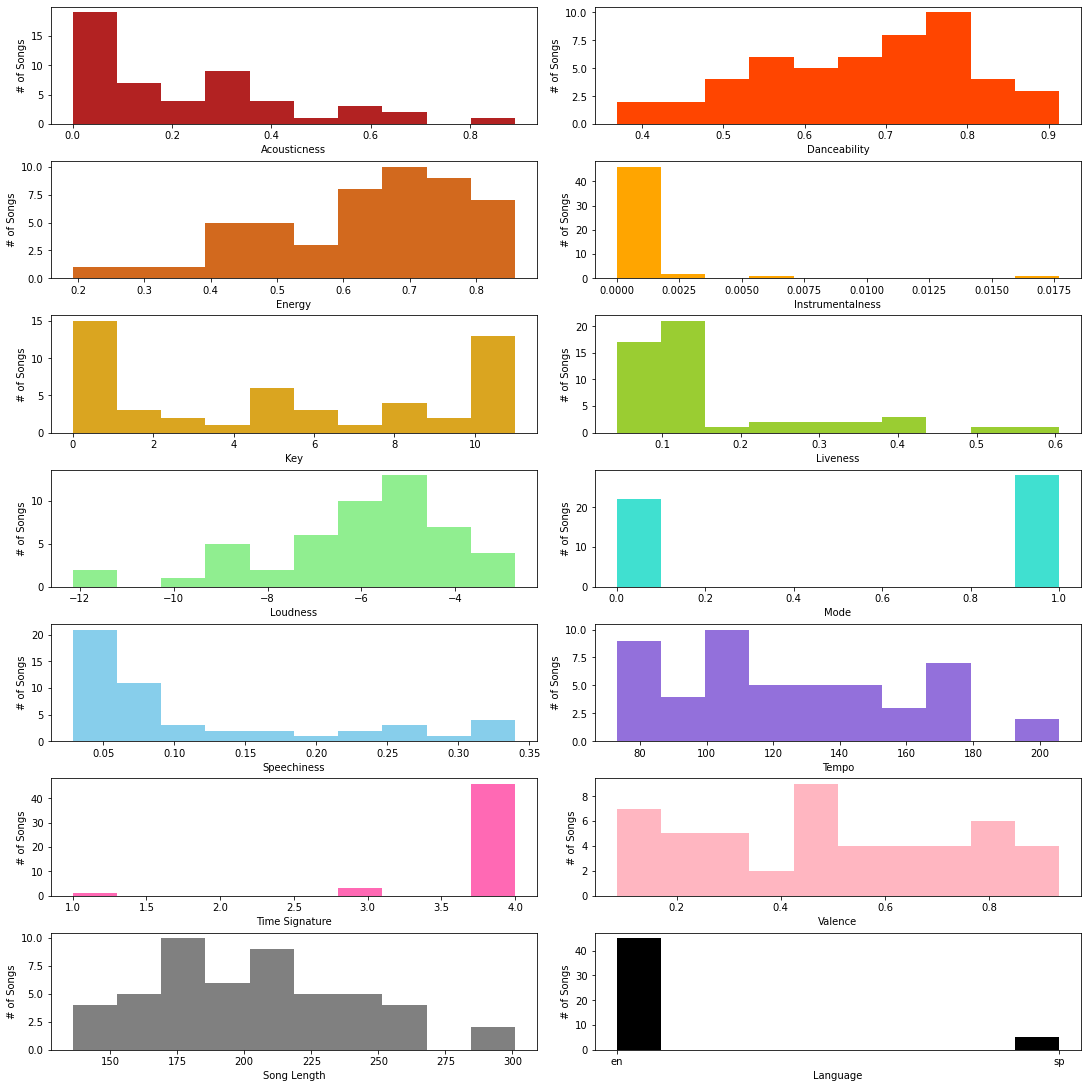

In [52]:
fig1, ax1 = plt.subplots(7, 2, layout = 'constrained') # (rows, columns)
fig1.set_figwidth(15) #change width size of the table
fig1.set_figheight(15) #change height size of the table
ax1[0, 0].hist(The_2022_Most_Streamed['acousticness'], color = 'firebrick')
ax1[0, 0].set_ylabel('# of Songs')
ax1[0, 0].set_xlabel('Acousticness')
ax1[0, 1].hist(The_2022_Most_Streamed['danceability'], color = 'orangered')
ax1[0, 1].set_ylabel('# of Songs')
ax1[0, 1].set_xlabel('Danceability')
ax1[1, 0].hist(The_2022_Most_Streamed['energy'], color = 'chocolate')
ax1[1, 0].set_ylabel('# of Songs')
ax1[1, 0].set_xlabel('Energy')
ax1[1, 1].hist(The_2022_Most_Streamed['instrumentalness'], color = 'orange')
ax1[1, 1].set_ylabel('# of Songs')
ax1[1, 1].set_xlabel('Instrumentalness')
ax1[2, 0].hist(The_2022_Most_Streamed['key'], color = 'goldenrod')
ax1[2, 0].set_ylabel('# of Songs')
ax1[2, 0].set_xlabel('Key')
ax1[2, 1].hist(The_2022_Most_Streamed['liveness'], color = 'yellowgreen')
ax1[2, 1].set_ylabel('# of Songs')
ax1[2, 1].set_xlabel('Liveness')
ax1[3, 0].hist(The_2022_Most_Streamed['loudness'], color = 'lightgreen')
ax1[3, 0].set_ylabel('# of Songs')
ax1[3, 0].set_xlabel('Loudness')
ax1[3, 1].hist(The_2022_Most_Streamed['mode'], color = 'turquoise')
ax1[3, 1].set_ylabel('# of Songs')
ax1[3, 1].set_xlabel('Mode')
ax1[4, 0].hist(The_2022_Most_Streamed['speechiness'], color = 'skyblue')
ax1[4, 0].set_ylabel('# of Songs')
ax1[4, 0].set_xlabel('Speechiness')
ax1[4, 1].hist(The_2022_Most_Streamed['tempo'], color = 'mediumpurple')
ax1[4, 1].set_ylabel('# of Songs')
ax1[4, 1].set_xlabel('Tempo')
ax1[5, 0].hist(The_2022_Most_Streamed['time_signature'], color = 'hotpink')
ax1[5, 0].set_ylabel('# of Songs')
ax1[5, 0].set_xlabel('Time Signature')
ax1[5, 1].hist(The_2022_Most_Streamed['valence'], color = 'lightpink')
ax1[5, 1].set_ylabel('# of Songs')
ax1[5, 1].set_xlabel('Valence')
ax1[6, 0].hist(The_2022_Most_Streamed['seconds'], color = 'gray')
ax1[6, 0].set_ylabel('# of Songs')
ax1[6, 0].set_xlabel('Song Length')
ax1[6, 1].hist(The_2022_Most_Streamed['lang'], color = 'black')
ax1[6, 1].set_ylabel('# of Songs')
ax1[6, 1].set_xlabel('Language')
plt.show()

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

I used histograms to compare all 50 tracks categorized by Audio Features. 
- A majority of songs were not acoustic. 
- Songs were leaned more danceable and energetic. 
- A majority of songs were not instrumentally driven. 
- Most of the key of songs were in C.
- A majority of the songs were studio recorded over and not live.
- None of the songs were too loud. 
- More than 50% of the songs were in major while less than 50% were in minor.
- A majority of the songs were non-speech. 
- Songs had less than 180 beats per minute with an exception of 2 songs.
- Nearly every song had Time Signature of 4 beats per bar except for 3 songs. 2 songs had 3 beats per bar and one song had 1 beat per bar.
- The valence score was a mixed amount, but a majority of songs having a 5 valence score. 
- Songs have mostly been around 2 minutes and 55 seconds, but mostly under 4 minutes and 30 seconds.

Looking at what songs were popular this year and the audio features they all have can be beneficial for songwriters and musicians that want to make popular music. 

Histogram data for Audio Features such as Instrumentalness, Time Signature and Language at a glance allows the songwriters to know that more vocal heavy songs in English with a time signature of 4 beats per bar are more likely to trend over instrumental songs with a different time signature.

Other Audio Features such as Valence, Time Length and Tempo are a mixed bag. The best thing to do with those features is use the Stream ranking to see where the higher ranked songs landed for each Audio Track

In [53]:
Top_10_Streamed_2022 = The_2022_Most_Streamed.head(10)

I'm only going to get the data from the top 10 tracks

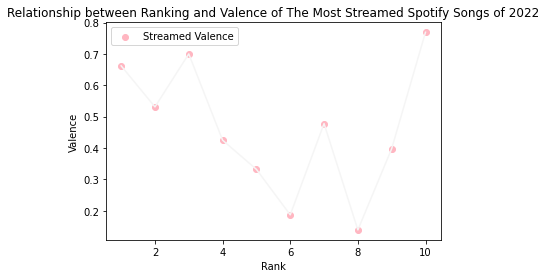

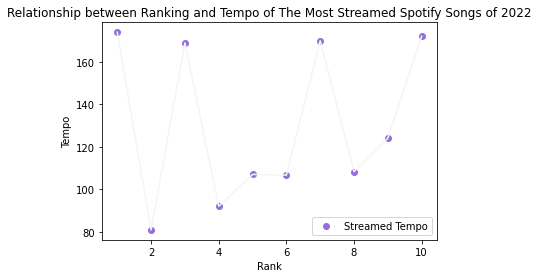

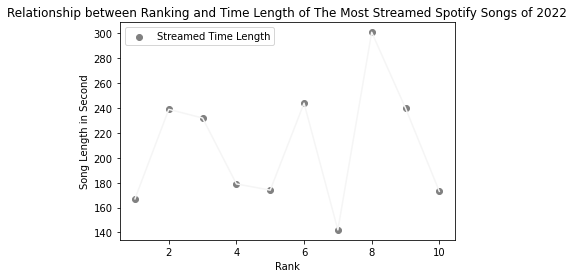

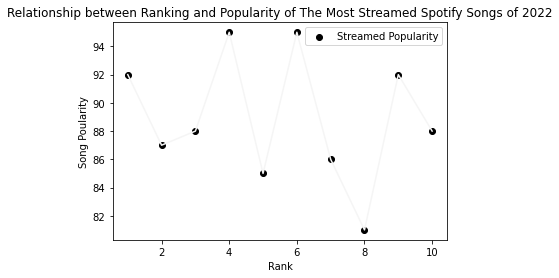

In [54]:
fig1, ax1 = plt.subplots()
ax1.scatter(Top_10_Streamed_2022['rank_num'], Top_10_Streamed_2022['valence'], label = 'Streamed Valence', color = 'lightpink')
ax1.set_xlabel('Rank')
ax1.set_ylabel('Valence')
ax1.set_title('Relationship between Ranking and Valence of The Most Streamed Spotify Songs of 2022')
ax1.legend()
plt.plot(Top_10_Streamed_2022['rank_num'], Top_10_Streamed_2022['valence'],  color = 'whitesmoke')
plt.show()

fig2, ax2 = plt.subplots()
ax2.scatter(Top_10_Streamed_2022['rank_num'], Top_10_Streamed_2022['tempo'], label = 'Streamed Tempo', color = 'mediumpurple')
ax2.set_xlabel('Rank')
ax2.set_ylabel('Tempo')
ax2.set_title('Relationship between Ranking and Tempo of The Most Streamed Spotify Songs of 2022')
ax2.legend()
plt.plot(Top_10_Streamed_2022['rank_num'], Top_10_Streamed_2022['tempo'],  color = 'whitesmoke')
plt.show()

fig3, ax3 = plt.subplots()
ax3.scatter(Top_10_Streamed_2022['rank_num'], Top_10_Streamed_2022['seconds'], label = 'Streamed Time Length', color = 'gray')
ax3.set_xlabel('Rank')
ax3.set_ylabel('Song Length in Second')
ax3.set_title('Relationship between Ranking and Time Length of The Most Streamed Spotify Songs of 2022')
ax3.legend()
plt.plot(Top_10_Streamed_2022['rank_num'], Top_10_Streamed_2022['seconds'],  color = 'whitesmoke')
plt.show()

fig3, ax3 = plt.subplots()
ax3.scatter(Top_10_Streamed_2022['rank_num'], Top_10_Streamed_2022['popularity'], label = 'Streamed Popularity', color = 'black')
ax3.set_xlabel('Rank')
ax3.set_ylabel('Song Poularity')
ax3.set_title('Relationship between Ranking and Popularity of The Most Streamed Spotify Songs of 2022')
ax3.legend()
plt.plot(Top_10_Streamed_2022['rank_num'], Top_10_Streamed_2022['popularity'],  color = 'whitesmoke')
plt.show()